<a href="https://colab.research.google.com/github/jakecupani/meteorite-landings/blob/main/Jake_Cupani_Final_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import requests
import json

!pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


import math
import scipy.stats as stats
from math import sqrt

import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 12

# About the Data

https://www.kaggle.com/nasa/meteorite-landings

https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh


# Data Collection and Cleaning

In [ ]:
# Read in the data
df = pd.read_csv("/content/drive/My Drive/INST627/meteorite-landings.csv",low_memory=False).dropna()

# Some data cleaning to make sure year values are for relevant years (a couple of rows had weird years)
df = df[(df['year'] <= 2016) & (df['year'] > 1800)]
df = df[df['mass'] > 0]
df = df[(df['reclat'] != 0) & (df['reclong'] != 0)]

drop_cols = ['name','id','recclass','fall','nametype']

# Create new column for hemisphere based on lat lon
df['hemisphere'] = df['reclat'].apply(lambda x: "Northern" if x > 0 else "Southern")

df = df.drop(drop_cols,axis=1)
df

,mass,year,reclat,reclong,GeoLocation,hemisphere
0,21.0,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",Northern
1,720.0,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",Northern
2,107000.0,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",Northern
3,1914.0,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",Northern
4,780.0,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",Southern
...,...,...,...,...,...,...
45711,172.0,1990.0,29.03700,17.01850,"(29.037000, 17.018500)",Northern
45712,46.0,1999.0,13.78333,8.96667,"(13.783330, 8.966670)",Northern
45713,3.3,1939.0,49.25000,17.66667,"(49.250000, 17.666670)",Northern
45714,2167.0,2003.0,49.78917,41.50460,"(49.789170, 41.504600)",Northern


# What years had the highest and lowest frequency of meteorite landings in past and present?

<b>Past: any year between 1900 and 1950 <br>
Present: any year after 1990</b>

Bar plots were used in this case to show the frequency of meteorite landings since we want to see how many times they happened over the years.

As we can see from the graph, 2003 had the highest frequency of meteorite landings, while 2013 had the least.


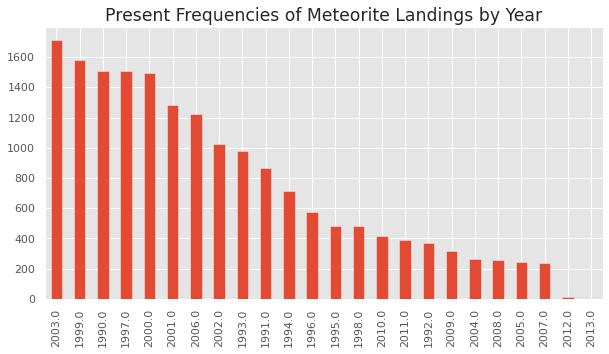

In [ ]:
# Present

df['year'][df['year'] >= 1990].value_counts().plot(kind = 'bar', title = 'Present Frequencies of Meteorite Landings by Year')

print("As we can see from the graph, 2003 had the highest frequency of meteorite landings, while 2013 had the least.")

Text(0.5, 0.98, 'Present Frequencies of Meteorite Landings (Fig. 1)')

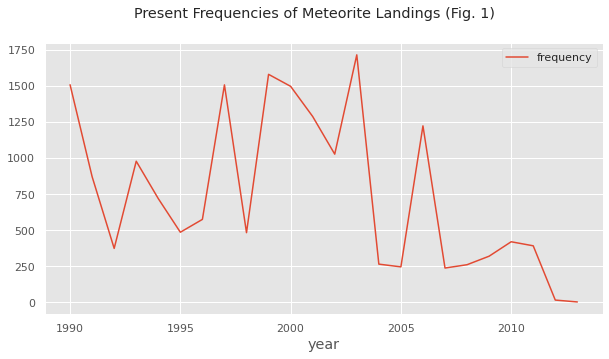

In [ ]:
present = df['year'][df['year'] >= 1990].value_counts()
present = pd.DataFrame(present).reset_index().rename(columns={"index": "year", "year": "frequency"}).sort_values(by=['year'])
present.plot(x ='year', y='frequency', kind = 'line')
plt.suptitle("Present Frequencies of Meteorite Landings (Fig. 1)")

As we can see from the graph, 1937 had the highest frequency of meteorite landings, while 1901 had the least.


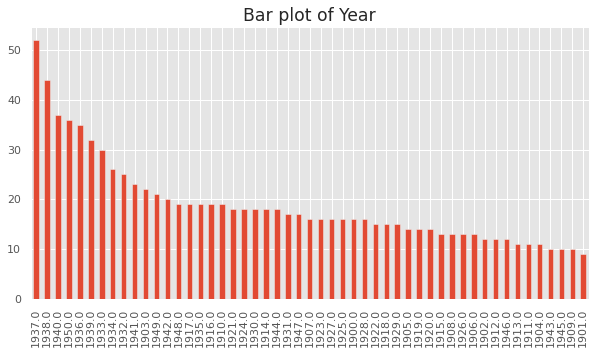

In [ ]:
df['year'][(df['year'] <= 1950) & (df['year'] >= 1900)].value_counts().plot(kind = 'bar', title = 'Bar plot of Year')

print("As we can see from the graph, 1937 had the highest frequency of meteorite landings, while 1901 had the least.")

Text(0.5, 0.98, 'Past Frequencies of Meteorite Landings (Fig. 2)')

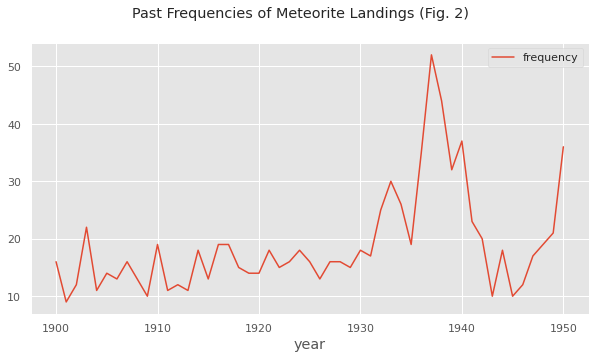

In [ ]:
past = df['year'][(df['year'] <= 1950) & (df['year'] >= 1900)].value_counts()
past = pd.DataFrame(past).reset_index().rename(columns={"index": "year", "year": "frequency"}).sort_values(by=['year'])
past.plot(x ='year', y='frequency', kind = 'line')
plt.suptitle("Past Frequencies of Meteorite Landings (Fig. 2)")

# In what areas of the world were meteorite landings most common? Does the distribution change over the years?

By using a scatter plot on top of a world map, it allows us to easily see where a majority of the meteorite landings happened.

In [ ]:
def plot_meteorites(df,title):
  geometry = [Point(xy) for xy in zip(df['reclong'], df['reclat'])]
  gdf = GeoDataFrame(df, geometry=geometry)   

  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=3)

  plt.suptitle(title)
  # Source: https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

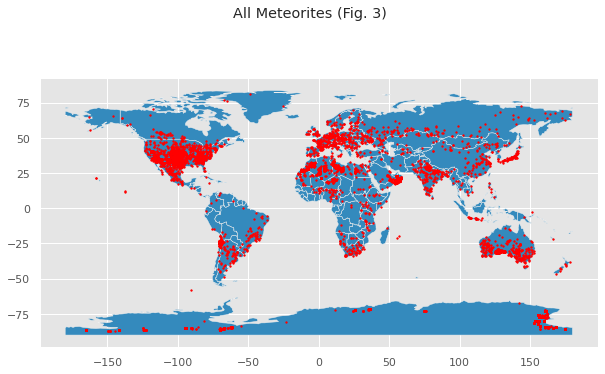

In [ ]:
# All meteorites
plot_meteorites(df,"All Meteorites (Fig. 3)")

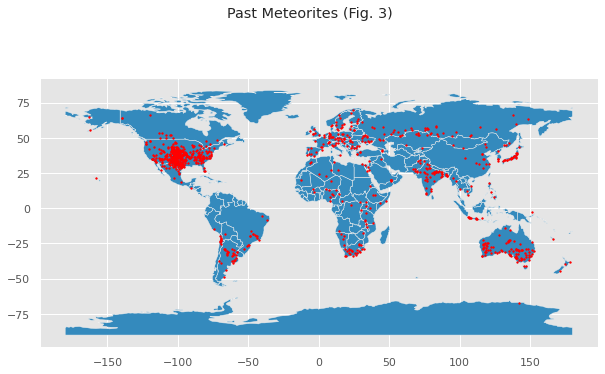

In [ ]:
# Past Meteorites

past_m = df[(df['year'] <= 1950) & (df['year'] >= 1900)]
plot_meteorites(past_m, "Past Meteorites (Fig. 3)")

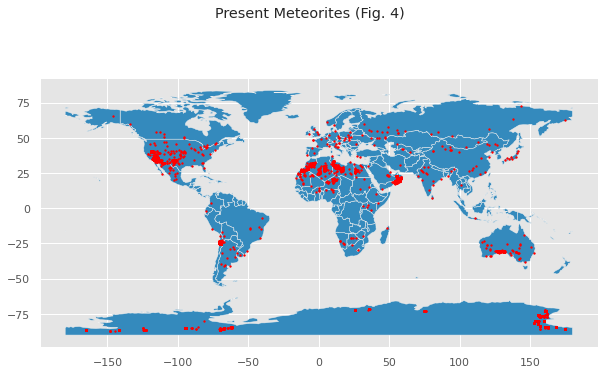

In [ ]:
# Present Meteorites

present_m = df[df['year'] >= 1990]
plot_meteorites(present_m, "Present Meteorites (Fig. 4)")

90s Meteorites


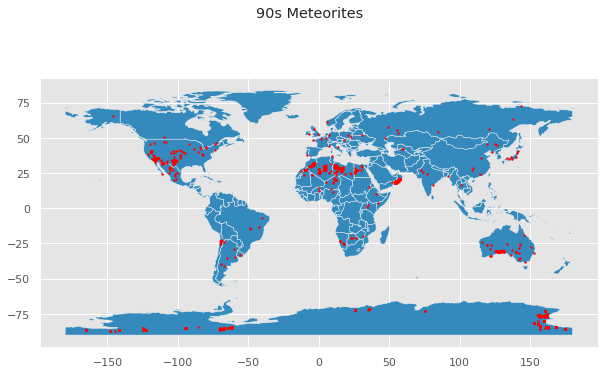

In [ ]:
# 90s Meteorites
df_90 = df[(df['year'] >= 1990) & (df['year'] <= 1999)]
print("90s Meteorites")
plot_meteorites(df_90, "90s Meteorites")

00s Meteorites


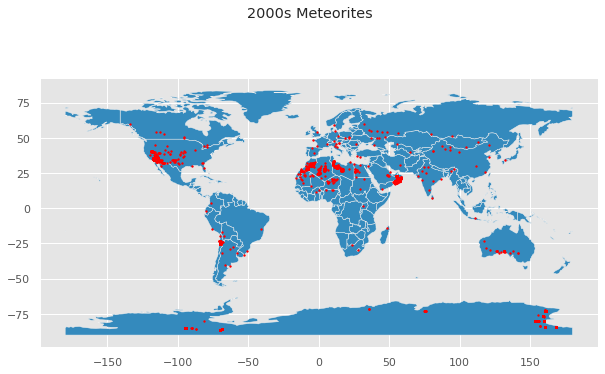

In [ ]:
# 00s Meteorites
df_00 = df[(df['year'] >= 2000) & (df['year'] <= 2009)]
print("00s Meteorites")
plot_meteorites(df_00,"2000s Meteorites")

10s Meteorites


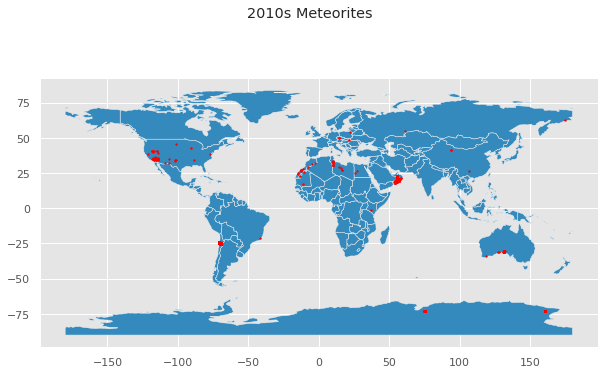

In [ ]:
# 10s Meteorites
df_10 = df[(df['year'] >= 2010) & (df['year'] <= 2019)]
print("10s Meteorites")
plot_meteorites(df_10,"2010s Meteorites")

As we can see, there's a general trend of meteorites landing in the western US, Peru, Northern Africa, Southern Australia, and parts of Europe. Another trend that I noticed is that there seem to be less meteorites in the 2010s than in the other decades.

# What is the distribution of masses amongst all of the meteorites?

> Indented block



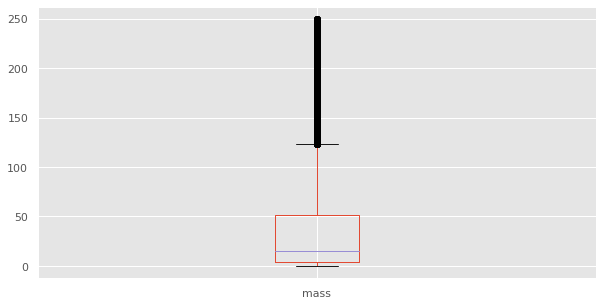

In [ ]:
df['mass'][df['mass'] < 250].plot(kind='box')

As we can see in the distribution plot, the distribution is highly skewed to the right with a majority of the values below 500 grams.
We can also say that the distribution is unimodal.
There are 7182 clear outliers that I will remove from my histogram to show the general distribution.



Text(0.5, 1.0, 'Distribution of Meteorite Masses (Fig. 5)')

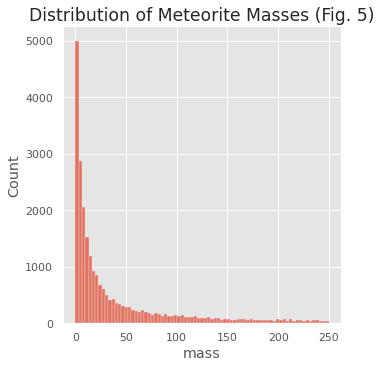

In [ ]:
print("As we can see in the distribution plot, the distribution is highly skewed to the right with a majority of the values below 500 grams.")
print("We can also say that the distribution is unimodal.")
print("There are",len(df[df['mass'] > 250]),"clear outliers that I will remove from my histogram to show the general distribution.")
print()

# sns.displot(df[df['mass'] < 2000], x="mass")
sns.displot(df[df['mass'] < 250], x="mass")

plt.title("Distribution of Meteorite Masses (Fig. 5)")


Looks like the more 'normal' mass meteorites are distributed evenly across the world.



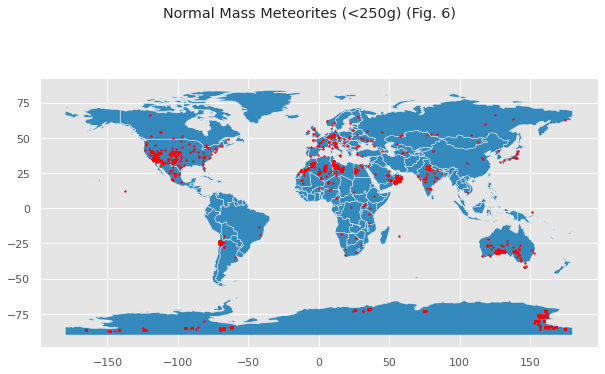

In [ ]:
print("Looks like the more 'normal' mass meteorites are distributed evenly across the world.")
print()

mass_df = df[df['mass'] < 250]

plot_meteorites(mass_df,"Normal Mass Meteorites (<250g) (Fig. 6)")

There seem to be more large mass meteorites in Southern Africa, the US, and parts of South America.



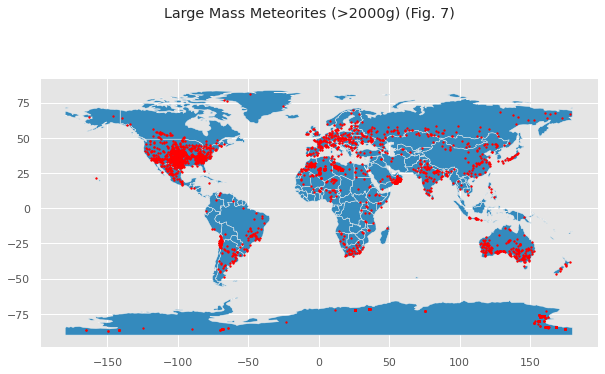

In [ ]:
print("There seem to be more large mass meteorites in Southern Africa, the US, and parts of South America.")
print()

mass_df = df[df['mass'] > 2000]

plot_meteorites(mass_df,"Large Mass Meteorites (>2000g) (Fig. 7)")

# What differences are there in the masses of Northern vs. Southern Hemisphere meteorites?

The bar chart shows the average mass of meteorites for the northern and southern hemispheres respectively.

Here we show the average mass of Northern vs Southern Hemisphere meteorites.
It is interesting to see that Northern Hemisphere meteorites have a higher average mass.



Text(0.5, 1.0, 'Northern vs. Southern Hemisphere Meteorite Masses (Fig. 8)')

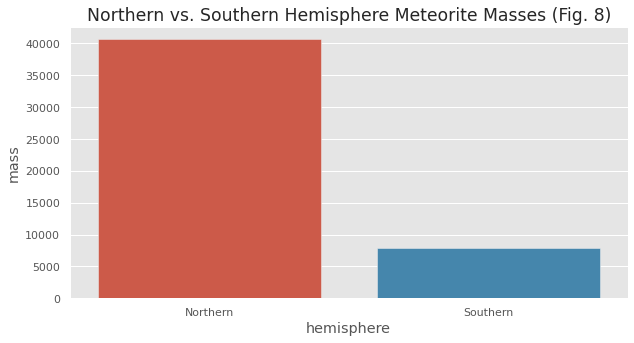

In [ ]:
print("Here we show the average mass of Northern vs Southern Hemisphere meteorites.")
print("It is interesting to see that Northern Hemisphere meteorites have a higher average mass.")
print()

hemisphere_bar = sns.barplot(x="hemisphere", y="mass", data=df,ci=None)
plt.title("Northern vs. Southern Hemisphere Meteorite Masses (Fig. 8)")

In [ ]:
# Is there any statistically significant difference in the masses of Northern vs Southern Hemisphere meteorites?

# H0: There is no difference between the masses of meteorites in the hemispheres. (avg difference 0).
# HA: There is a difference between the masses of meteorites in the hemispheres. (avg difference != 0).

northern = df[df['hemisphere'] == 'Northern']
southern = df[df['hemisphere'] == 'Southern']

north_mass = northern['mass']
south_mass = southern['mass']

# Point Estimate
mass_pe = north_mass.mean() - south_mass.mean()
print("The point estimate is:",mass_pe)

# Degree of Freedom
deg_freedom = len(north_mass) if len(north_mass) < len(south_mass) else len(south_mass)
deg_freedom = deg_freedom - 1
print("The degrees of freedom is:",deg_freedom)

# Standard Error
north_se = north_mass.std()**2/len(north_mass)
south_se = south_mass.std()**2/len(south_mass)

mass_se = sqrt(north_se + south_se)
print("The standard error is:",mass_se)

# 5. Calculate the t score and the p-value.
mass_t = (mass_pe - 0)/mass_se
print("The t score is:",mass_t)

mass_p = stats.distributions.t.sf(mass_t,deg_freedom)
print("The p value is:",mass_p)

print("Therefore, since the p-value is less than an alpha of 0.05, we can reject the null hypothesis and conclude that there is a significant difference in the masses of meteorites in the Northern and Southern Hemisphere.")

The point estimate is: 32648.79079167894
The degrees of freedom is: 8258
The standard error is: 10687.521940131997
The t score is: 3.054851346698214
The p value is: 0.001129450442007376
Therefore, since the p-value is less than an alpha of 0.05, we can reject the null hypothesis and conclude that there is a significant difference in the masses of meteorites in the Northern and Southern Hemisphere.


# Key Points

As we can see from the analysis done above, there are some noteable points that we have learned from this dataset.



*   1998 had the highest frequency of meteorite landings, while 2013 had the least in the last three decades.
*   1937 had the highest frequency of meteorite landings, while 1901 had the least in the early 1900s.
*   The distribution of masses is unimodal and highly skewed to the right with a majority of the values below 250 grams.
*   Meteorites are mainly found along the 25 and -25 degree latitude lines.
*   There's a general trend of meteorites landing in the western US, Southern America, Norther Africa, Southern Austrailia, and parts of Europe. Another trend that I noticed is that there seem to be less meteorites in the 2010s than in the other decades.

